In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, '0.01')

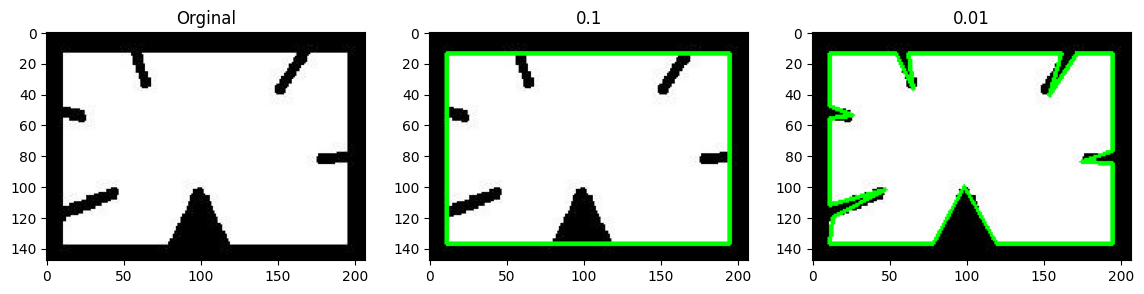

In [2]:
image = cv.imread(r"D:\Opencv\class.vision-master\images\approx.jpg")
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

ret, thresh = cv.threshold(gray, 127, 255, 0)
contours, h = cv.findContours(thresh, 1, 2)

cnt = contours[0]
perimeter = cv.arcLength(cnt, True)

first_output = image.copy()
epsilon = 0.1 * perimeter
approx = cv.approxPolyDP(cnt, epsilon, True)
cv.drawContours(first_output, [approx], 0, (0,255,0), 2)

second_output = image.copy()
epsilon = 0.01 * perimeter
approx = cv.approxPolyDP(cnt, epsilon, True)
cv.drawContours(second_output, [approx], 0, (0,255,0), 2)

plt.figure(figsize=[14,8])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("Orginal")
plt.subplot(132);plt.imshow(first_output[...,::-1]);plt.title("0.1")
plt.subplot(133);plt.imshow(second_output[...,::-1]);plt.title("0.01")

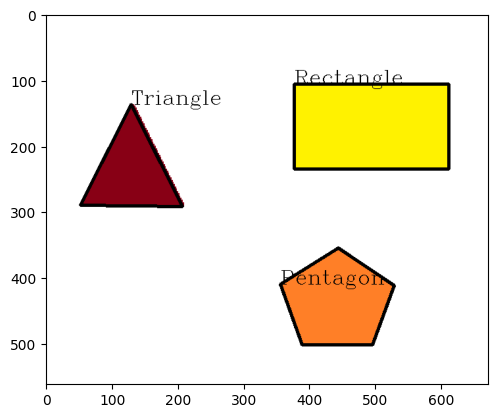

In [7]:
image = cv.imread(r"D:\Opencv\class.vision-master\images\shapes2.png")
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

_, binary_image = cv.threshold(gray, 245, 255, cv.THRESH_BINARY_INV)
imagecontours, _ = cv.findContours(binary_image, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

for c in imagecontours:
    epsilon = 0.01 * cv.arcLength(c, True)
    approximations = cv.approxPolyDP(c, epsilon, True)
    cv.drawContours(image, [approximations], 0, (0), 3)
    
    i, j = approximations[0][0]
    
    if len(approximations) == 3:
         cv.putText(image, "Triangle", (i, j), cv.FONT_HERSHEY_COMPLEX, 1, 0, 1)
    elif len(approximations) == 4:
        cv.putText(image, "Rectangle", (i, j), cv.FONT_HERSHEY_COMPLEX, 1, 0, 1)
    elif len(approximations) == 5:
        cv.putText(image, "Pentagon", (i, j), cv.FONT_HERSHEY_COMPLEX, 1, 0, 1)
    elif 6< len(approximations) < 15:
        cv.putText(image, "Ellipse", (i, j), cv.FONT_HERSHEY_COMPLEX, 1, 0, 1)
    else:
        cv.putText(image, "Circle", (i, j), cv.FONT_HERSHEY_COMPLEX, 1, 0, 1)

plt.imshow(image[...,::-1])

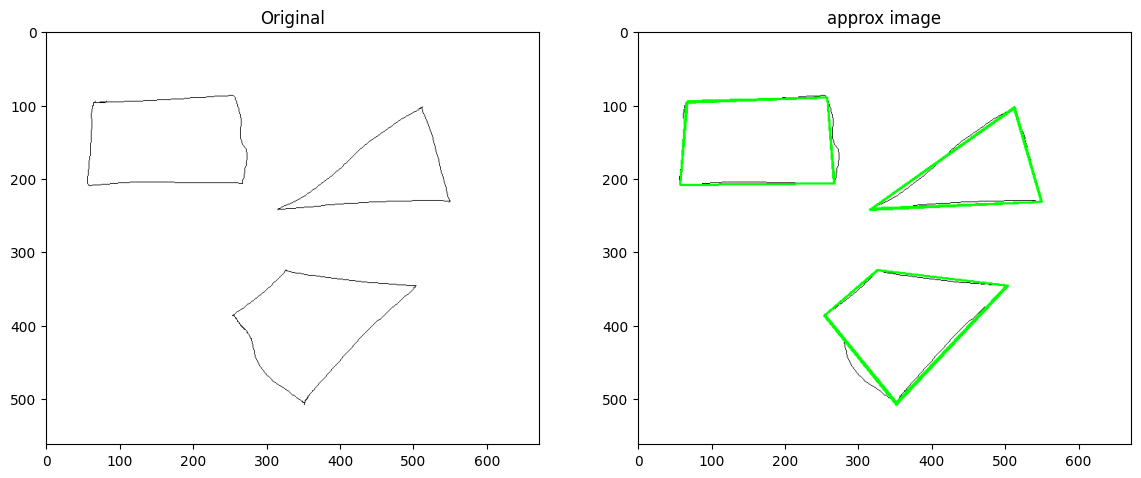

In [8]:
image = cv.imread(r"D:\Opencv\class.vision-master\images\sketch.png")
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

ret, thresh = cv.threshold(gray, 127, 255, cv.THRESH_BINARY_INV)

contours, hiererchy = cv.findContours(thresh.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
copy = image.copy()

for c in contours:
    accuracy = 0.03 * cv.arcLength(c, True)
    approx = cv.approxPolyDP(c, accuracy, True)
    cv.drawContours(copy, [approx], 0, (0, 255, 0), 2)
    
plt.figure(figsize=[14,8])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("Original");
plt.subplot(122);plt.imshow(copy, cmap='gray');plt.title("approx image");